In [60]:
from keras_tqdm import TQDMNotebookCallback
import keras
from keras.preprocessing import image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

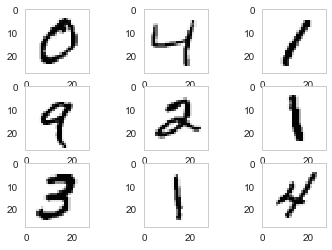

In [62]:
for i in range(1,10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i, :, :])

In [63]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # Expanding Dimension as (image_row, image_column, channel)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)    # to be compatible for tensorflow backend

x_train /= 255  # Getting input in range (0,1)
x_test /= 255

input_shape = (28, 28, 1)
num_classes = 10
batch_size = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model Overview

### Used image augmentation along with batch normalization and dropout in Convolution neural network.

In [64]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=batch_size,seed=8)
test_batches = gen.flow(x_test, y_test, batch_size=batch_size,seed=8)

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [84]:
model.fit_generator(generator=batches, steps_per_epoch=int(batches.n/batch_size), epochs=1, 
                    validation_data=test_batches, validation_steps=int(test_batches.n/batch_size),callbacks=[TQDMNotebookCallback()],verbose=0)

In [86]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023599932216
Test accuracy: 0.993
